# Optimizing Aircraft Acquisition Project 
### Authored by Winny Chepkoech

## Overview

The Optimizing Aircraft Acquisition Project aims to guide the expansion of our company by spotting safest and reliable aircraft for both commercial and private use. By utilizing aviation aciidents database according to the National Transportation Safety Board, we will be able to analyze safety records, miantainance and operational costs to all aircrafts models. This approach will give us an opportuinity to place aircrafts and recommend the best models for acquisition based on risk factors posssibly to be encountered by each. Our main goal is to ensure minimal risk with strategic investment that will provide our company with excellenct operations with its commitment to providing safety to travellers.

## Business Understanding
As our company diversifies its portfolio by entering the aviation industry, selecting the right aircraft is crucial to ensure both safety and operational efficiency. The primary goal is to identify aircraft with the lowest risk, encompassing safety records, operational costs, maintenance needs, and overall reliability. By thoroughly evaluating these factors, we can make informed decisions that align with the company's commitment to excellence and sustainability. This approach will help mitigate potential risks, optimize operational performance, and ensure a smooth entry into the aviation market.

## Objectives 
* To evaluate and rank various aircraft models based on their safety records and overall reliability. 
* To identify the top three aircraft models that present the lowest risk for the company's new aviation venture.
* To provide actionable recommendations and strategies for purchasing and operating the selected aircraft, ensuring optimal performance and safety. 

## Data Understanding
The data is obtained from the NTSB aviation accident database, which contains detailed information on civil aviation accidents and selected incidents from 1962 onwards, covering the United States, its territories, and international waters. It includes preliminary reports made available within days of an accident, which are updated with factual information and finalized with a description of the probable cause.Leveraging this rich dataset through data visualization and exploratory data analysis can significantly contribute to improving the quality and safety of air travel. The data had `88889` rows and `31` columns. 

In [130]:
#importing neccessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
# Set the style of the visualization
sns.set_style("whitegrid")
import zipfile 
import warnings 

warnings.filterwarnings("ignore")

In [131]:
# unzipping the file
zip_file_path = 'archive (24).zip' 
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents
    zip_ref.extractall()

## Reading the data

In [132]:
# reading the data 
aviation_df = pd.read_csv("AviationData.csv", encoding='latin1')
aviation_df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Checking Data 

In [133]:
#cheking information about data 
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [134]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Since there are alot of columns we will remove irrelevant ones.

In [135]:
# removing irrelevant columns 
irrelevant_columns = ["Event.Id", "Longitude", "Latitude", "Accident.Number","Airport.Code", "Publication.Date","Registration.Number" ]

aviation_df.drop(columns= irrelevant_columns, inplace=True)

All data types are objects execpt for number of engines columns. There are `88889` rows and `26` colums of data. 

## Tyding the Dataset

In [136]:
#check for missing values
def missing_values(data):
    missing_values = data.isnull().sum()
    return missing_values
# calling the function to check missing values 
missing_values(aviation_df)


Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
dtype: int64

Since there are some missing values evident its vital we clean the data. 

In [137]:
#creating relecvant columns to be cleaned 
relevant_columns = [
    "Injury.Severity",
    "Aircraft.damage",
    "Country",
    "Location",
    "Make",
    "Model",
    "Amateur.Built",
    "Number.of.Engines",
    "Engine.Type",
    "Purpose.of.flight",
    "Broad.phase.of.flight",
    "Weather.Condition",
    "Report.Status"] 

In [138]:
#filling missing values with uknown
aviation_df[relevant_columns] = aviation_df[relevant_columns].fillna("Unknown")
#calling a function to check missing values 
missing_values(aviation_df)

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Airport.Name              36185
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56602
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description           56866
Schedule                  76307
Purpose.of.flight             0
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

In [139]:
#creating numerica data 
numeric_columns = [
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured"
]

In [140]:
#filling missing values in numeric column with 0
aviation_df[numeric_columns] = aviation_df[numeric_columns].fillna(0)
#calling a function to check missing values 
missing_values(aviation_df)

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Airport.Name              36185
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56602
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description           56866
Schedule                  76307
Purpose.of.flight             0
Air.carrier               72241
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

Since some columns had less than `40,000` missing values it was wise to replace them with `uknown`, for the rest with more than `40,000` missing vlaues we will drop the whole columns. 

In [141]:
#selecting columns to be dropped 
dropped_columns = ["Airport.Name", "Aircraft.Category", "FAR.Description", "Schedule", "Air.carrier", "Broad.phase.of.flight"]

# dropping the columns 
aviation_df.drop(columns=dropped_columns, inplace=True)
#confirming that there are no missing values in the dataset 
missing_values(aviation_df)

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [142]:
#checking for row infomation in the column 
aviation_df["Weather.Condition"].value_counts()
# changing the unk, to uknown 
aviation_df["Weather.Condition"].replace({'UNK':'Unknown', "Unk": "Unknown"},inplace=True)
#checking the changes 
aviation_df["Weather.Condition"].value_counts()

Weather.Condition
VMC        77303
IMC         5976
Unknown     5610
Name: count, dtype: int64

In [143]:
# changing the UKN, to uknown 
aviation_df["Engine.Type"].replace({'UNK':'Unknown'},inplace=True)

In [144]:
# correcting naming in aeroplane makes
aviation_df["Make"].replace({'CESSNA':'Cessna', 'PIPER': 'Piper'},inplace=True)

In [145]:
# correcting aeroplane make naming 
aviation_df["Make"].replace({'AIRBUS':'Airbus', 'AIRBUS INDUSTRIE': 'Airbus', 'Airbus Industrie': 'Airbus','Airbus Industries': 'Airbus', 'BOEING':'Boeing', 'BOEING COMPANY': 'Boeing', 'MCDONNELL DOUGLAS AIRCRAFT CO': 'McDonnell Douglas', 'Mcdonnell Douglas': 'McDonnell Douglas', 'Mcdonald Douglas': 'McDonnell Douglas', 'MCDONNELL DOUGLAS CORPORATION': 'McDonnell Douglas', 'Mcdonnell-douglas': 'McDonnell Douglas', 'MCDONNELL DOUGLAS': 'McDonnell Douglas' },inplace=True)


In [146]:
#checking for duplicated data
aviation_df.duplicated().value_counts()

False    88846
True        43
Name: count, dtype: int64

In [147]:
# Remove duplicates based on all columns
aviation_df = aviation_df.drop_duplicates()

In [148]:
#creating a survivors column 
aviation_df['Total.Survivors'] = (aviation_df['Total.Serious.Injuries'] + aviation_df['Total.Minor.Injuries'] + aviation_df['Total.Uninjured']) - aviation_df['Total.Fatal.Injuries']


In [149]:
# Extracting the year from the 'Event.Date' column 
aviation_df["Year"] = pd.DatetimeIndex(aviation_df["Event.Date"]).year
# now drop the year column
aviation_df.drop(columns="Event.Date", inplace=True)


In [150]:
#convert the specified columns to float
aviation_df[numeric_columns] = aviation_df[numeric_columns].astype(float)
# cheking the datatype
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88846 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88846 non-null  object 
 1   Location                88846 non-null  object 
 2   Country                 88846 non-null  object 
 3   Injury.Severity         88846 non-null  object 
 4   Aircraft.damage         88846 non-null  object 
 5   Make                    88846 non-null  object 
 6   Model                   88846 non-null  object 
 7   Amateur.Built           88846 non-null  object 
 8   Number.of.Engines       88846 non-null  object 
 9   Engine.Type             88846 non-null  object 
 10  Purpose.of.flight       88846 non-null  object 
 11  Total.Fatal.Injuries    88846 non-null  float64
 12  Total.Serious.Injuries  88846 non-null  float64
 13  Total.Minor.Injuries    88846 non-null  float64
 14  Total.Uninjured         88846 non-null  flo

Since our data now is clean it is vital to proceed to visualization

## Exploratory Analysis

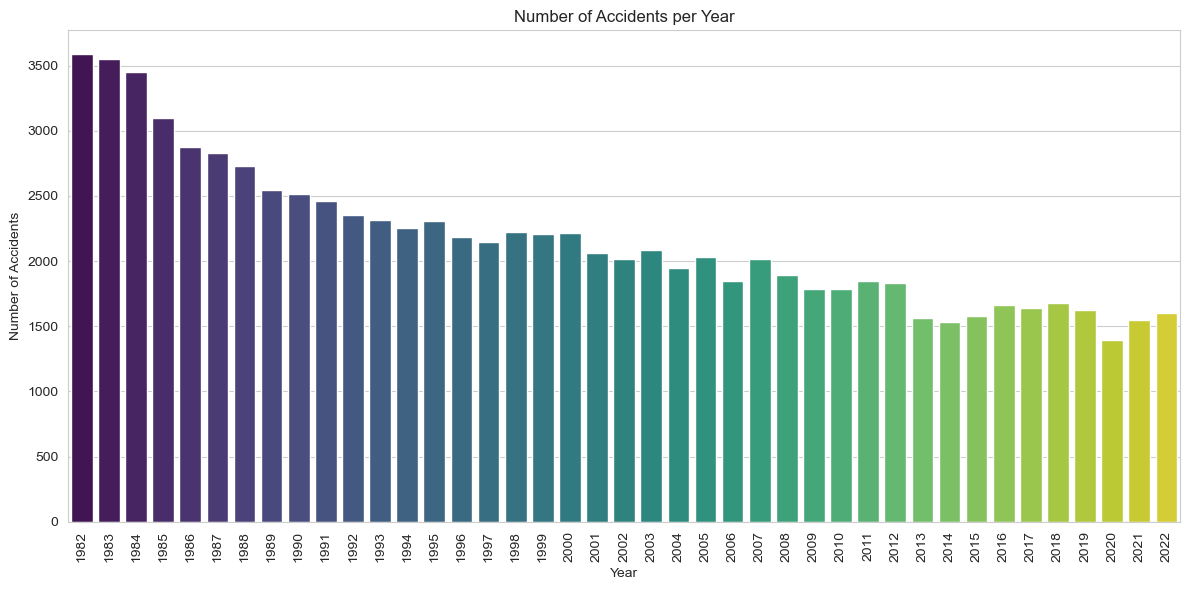

In [151]:
# using Bar Plot to determine Number of Accidents per Year

# Filter out years 1948 to 1981 since they have 0 values
filtered_df = aviation_df[aviation_df['Year'] >= 1982]

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=filtered_df, palette='viridis')

# Setting plot title and labels
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

* It can be seen that accidents in eroplanes have been reduing per year 

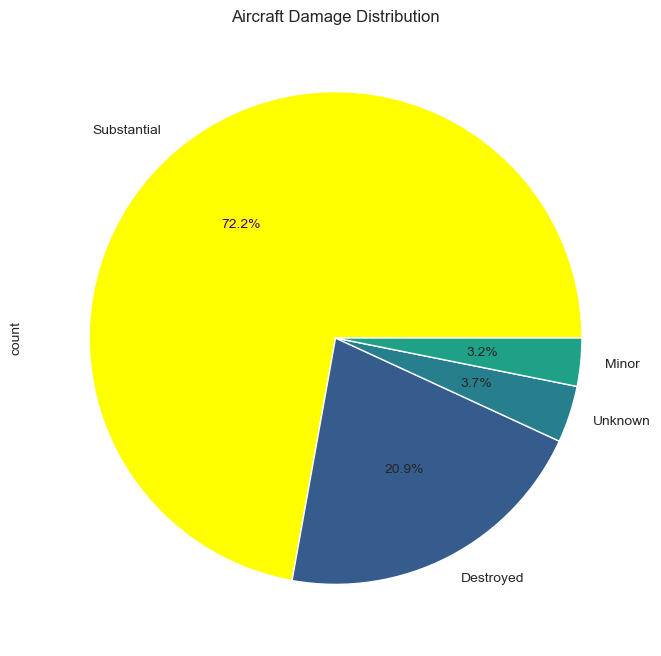

In [152]:

#Pie Chart for Aircraft Damage
plt.figure(figsize=(8, 8))
aviation_df['Aircraft.damage'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Aircraft Damage Distribution')
# Customizing percentage labels
plt.gca().set_prop_cycle(None) 
plt.gca().patches[0].set_facecolor('yellow')  
plt.gca().texts[1].set_color('indigo')  

plt.show()

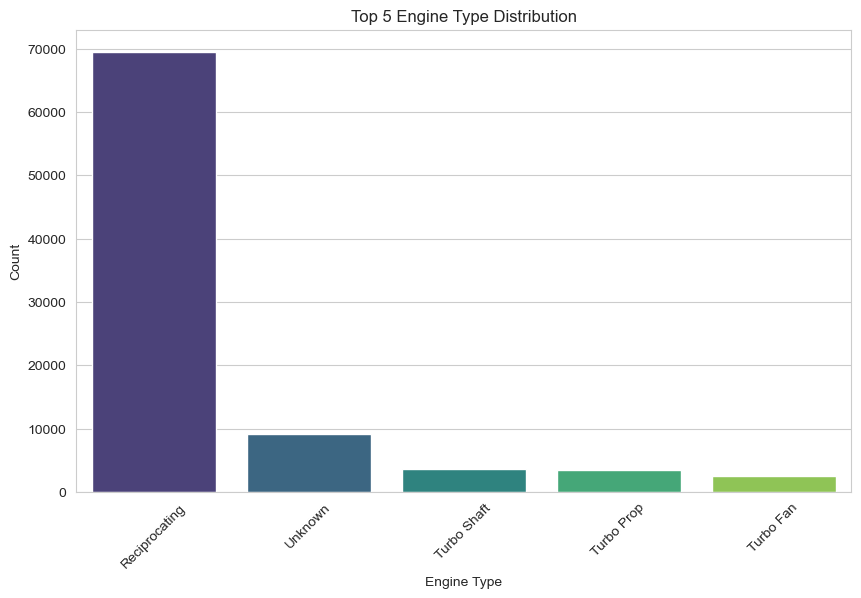

In [153]:

# Get the top five engine types
top_engine_types = aviation_df['Engine.Type'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top five engine types
filtered_df = aviation_df[aviation_df['Engine.Type'].isin(top_engine_types)]

# Bar Plot for Engine Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Engine.Type', data=filtered_df, palette='viridis', order=top_engine_types)
plt.title('Top 5 Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


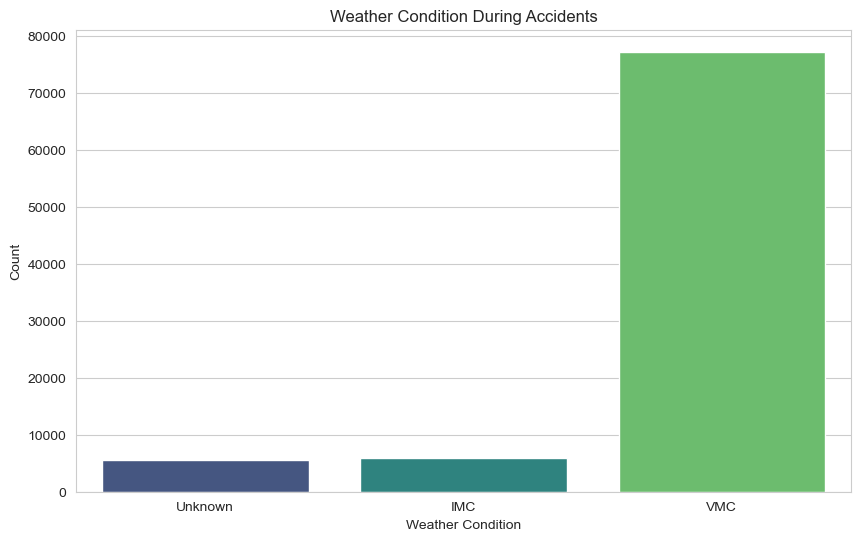

In [154]:
#Count Plot for Weather Condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather.Condition', data=aviation_df, palette='viridis')
plt.title('Weather Condition During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

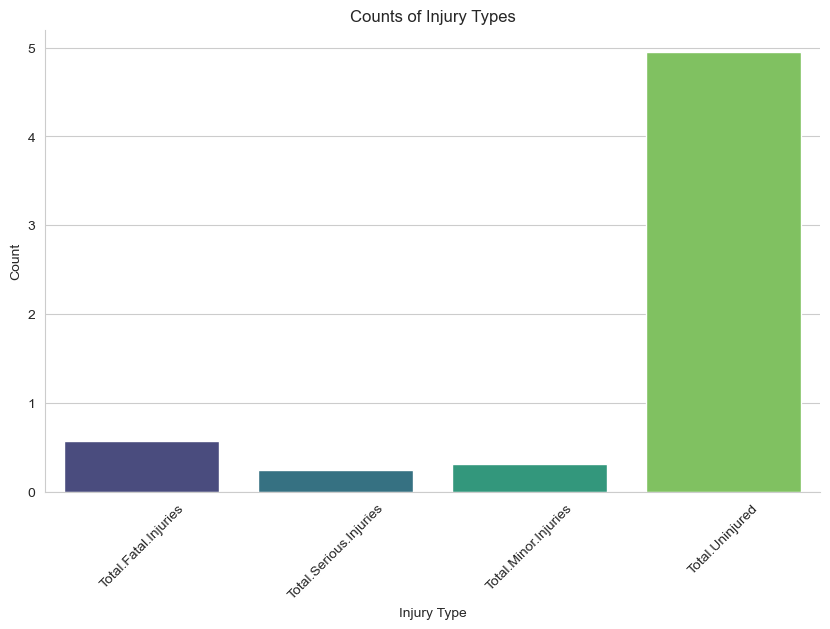

In [155]:

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='value', data=aviation_df[numeric_columns].melt(), palette='viridis', ci=None)
plt.title('Counts of Injury Types')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False) 
plt.show()


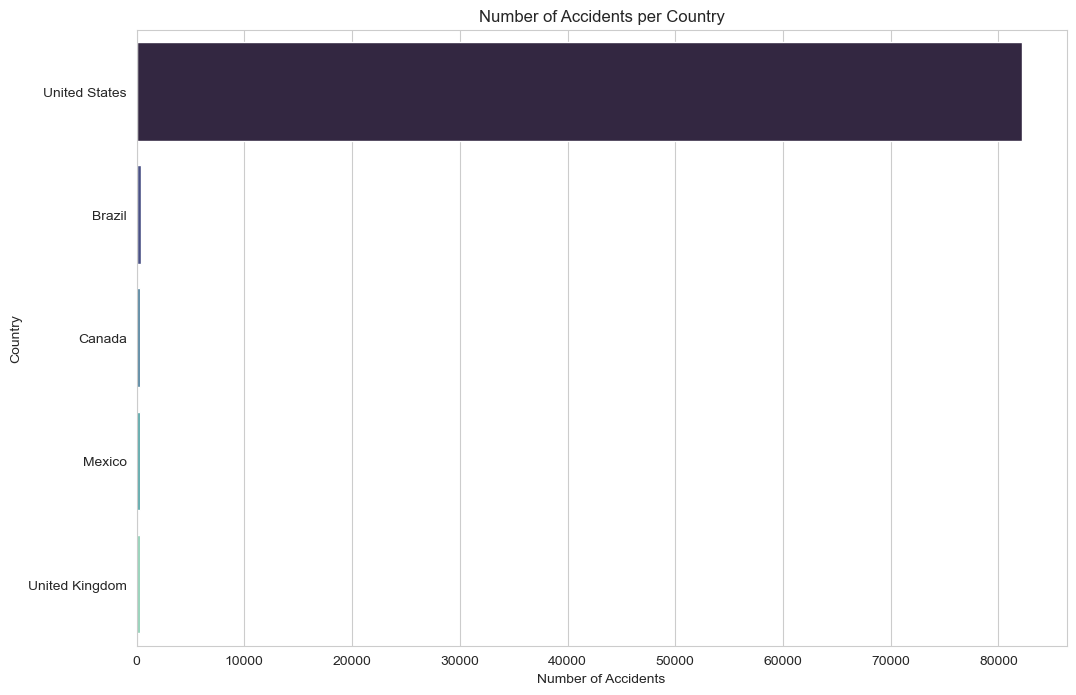

In [156]:
# Get number of accidents per country
accidents_per_country = aviation_df['Country'].value_counts().head(5)  

# Create a figure and axis object
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(111)

# Create the count plot using seaborn
sns.barplot(y=accidents_per_country.index, x=accidents_per_country.values, palette='mako', ax=ax)
ax.set_title('Number of Accidents per Country')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Country')

plt.show()

<Figure size 1600x2200 with 0 Axes>

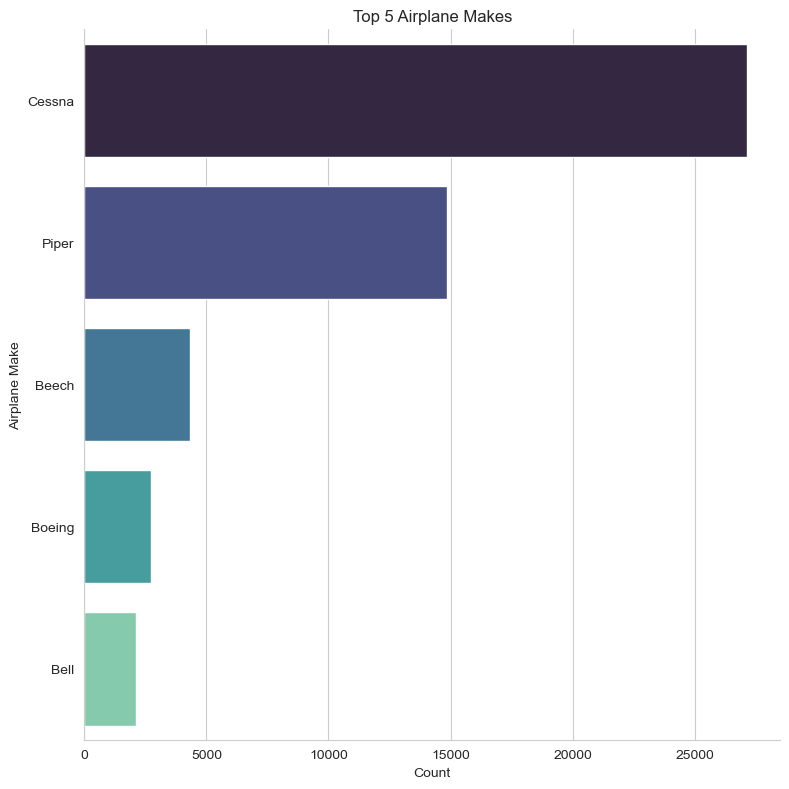

In [157]:
#graph showing top 5 most used aeroplane models 
# Get the top 10 most frequent makes
top_10_makes = aviation_df['Make'].value_counts().head(5).index

# Plotting using seaborn catplot
plt.figure(figsize=(16, 22))
sns.catplot(y='Make', data=aviation_df, kind="count", palette="mako",
           order=top_10_makes, height=8)
plt.title('Top 5 Airplane Makes')
plt.ylabel('Airplane Make')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

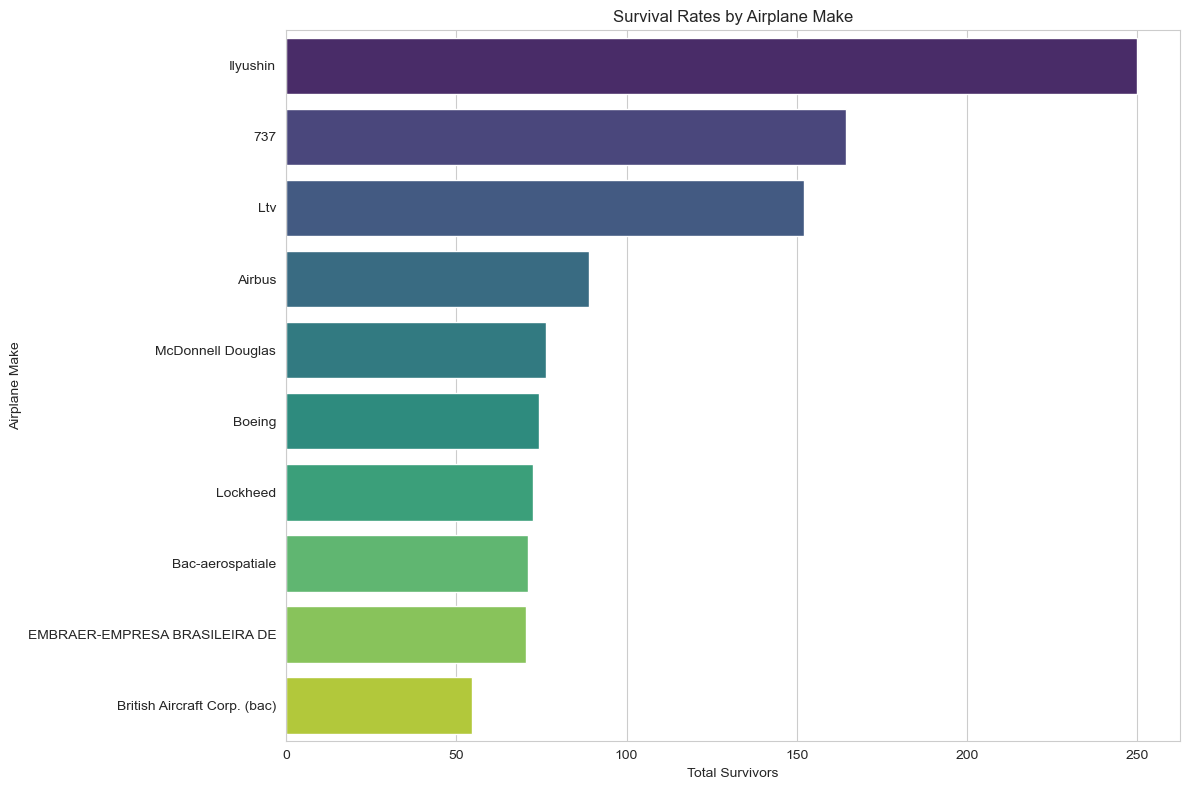

In [158]:
# Calculate survival rate for each make

survival_rates = aviation_df.groupby('Make')['Total.Survivors'].mean().reset_index()

# Sort by total survivors and select top 10 makes
top_10_survival_rates = survival_rates.sort_values(by='Total.Survivors', ascending=False).head(10)

# Plotting using seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Total.Survivors', y='Make', data=top_10_survival_rates, palette='viridis')
plt.title('Survival Rates by Airplane Make')
plt.xlabel('Total Survivors')
plt.ylabel('Airplane Make')
plt.tight_layout()
plt.show()

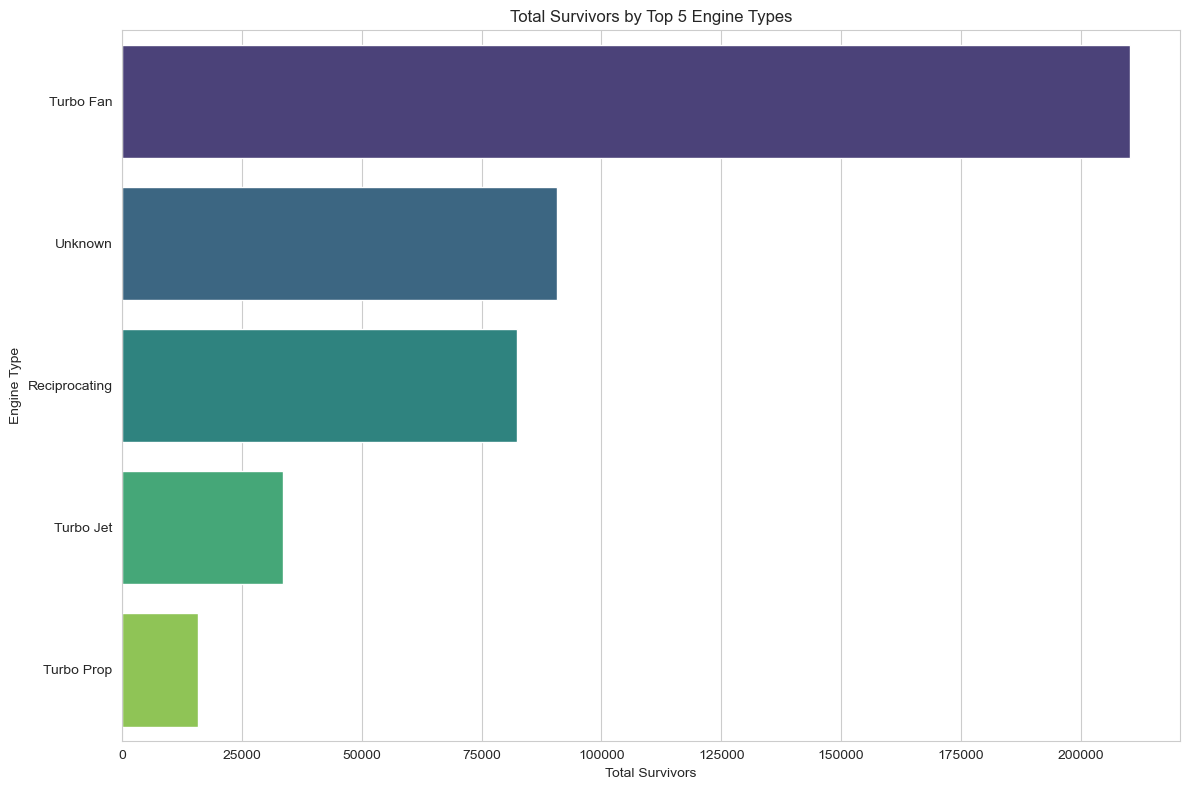

In [159]:
#graph showing survival rate per engine type 
# Group by Engine.Type and sum up Total.Survivors
engine_survivors = aviation_df.groupby('Engine.Type')['Total.Survivors'].sum().reset_index()

# Sort engine types by Total.Survivors and select top 5
engine_survivors_top5 = engine_survivors.sort_values(by='Total.Survivors', ascending=False).head(5)

# Plotting using seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Total.Survivors', y='Engine.Type', data=engine_survivors_top5, palette='viridis')
plt.title('Total Survivors by Top 5 Engine Types')
plt.xlabel('Total Survivors')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()

## Conclusion
* It can be seen from the exploratory analysis that accidents were more rampant during 20th century.
*  `72%`of the aeroplanes encountered substantial damage while less than `4%` encountred minor damages. This shows that most of aeroplanes are damaged beyond repair when accident occur. 
* `Reciprocating` is the most engine type used by aeroplanes. Less than `10,000` used `turbo shaft, turbo fan` and `turbo prop.`
*  Most of the accidents occured during `VMC.`
* `United States` had the leading number of accidents occuring.
* `cessna` had the highest number rank in aeroplane model making.
* `llyushin` model had the highest number of survival rates, other models like `Airbus, Boeing, Mcdonald Douglas` and `737` also had highest number of survuvorship. 
* `Turbo fan` is the leading engine type with large number of surviviors.


## Recommendation 
1. `Prioritize Safety`: Tested Models: Focus on aircraft models like Illyushin with proven high survival rates to mitigate operational risks and ensure passenger safety.

2. `Evaluate Engine Type Impact`: Given Turbofan engines' higher survival rates, prioritize aircraft equipped with this type to enhance safety during accidents and emergencies.

3. `Geographical Risk Awareness`: Recognize the United States' higher accident rates and implement tailored operational strategies and safety protocols accordingly.

4. `Optimize Reliability and Performance`: Select aircraft models with low accident rates and robust reliability records to optimize operational performance and minimize risks in the new aviation venture.